# Heaps

min-heap and max-heap arrays represent the preorder traversal of the binary tree.

heapq library only supports min-heap. to build a max-heap we can just negate the values.

In [62]:
# Build Min Heap (Heapify)
# TC: O(n) SC: O(1) arranges in place

import heapq
arr=[-4,3,1,0,2,5,10,8,12,9]
heapq.heapify(arr)
arr

[-4, 0, 1, 3, 2, 5, 10, 8, 12, 9]

In [63]:
# Heap Push
# Insert an element. TC O(log n) SC: O(1)

heapq.heappush(arr, 7)
arr
print(arr[0]) # peek the min element

-4


In [64]:
# Extract Min
# Remove the smallest element. TC O(log n) SC: O(1)
mini=heapq.heappop(arr)
mini

-4

In [65]:
# Heap Sort
# Sort the array in ascending order. TC O(n log n) SC: O(n)
ans=[0]*len(arr)
for i in range(len(arr)):
    ans[i]=heapq.heappop(arr)
ans

[0, 1, 2, 3, 5, 7, 8, 9, 10, 12]

In [66]:
# Max Heap
# Invert the sign of the elements in the array
arr=[-4,3,1,0,2,5,10,8,12,9]
for i in range(len(arr)):
    arr[i]=-arr[i]
max_heap=heapq.heapify(arr)
largest=-heapq.heappop(arr)
largest

12

In [67]:
# Build heap from scratch. When we have to add elements one by one
# TC: O(nlog n) SC: O(n)
arr=[-4,3,1,0,2,5,10,8,12,9]
heap = []
for i in arr:
    heapq.heappush(heap, i)
heap

[-4, 0, 1, 3, 2, 5, 10, 8, 12, 9]

## Implementation

- In an array representation of Heap for any i^th index in array, the 2*i+1^th and 2*i+2^th indices are the children.
- Similarly for any j^th node (j-1)//2^th element is the parent node. 

- 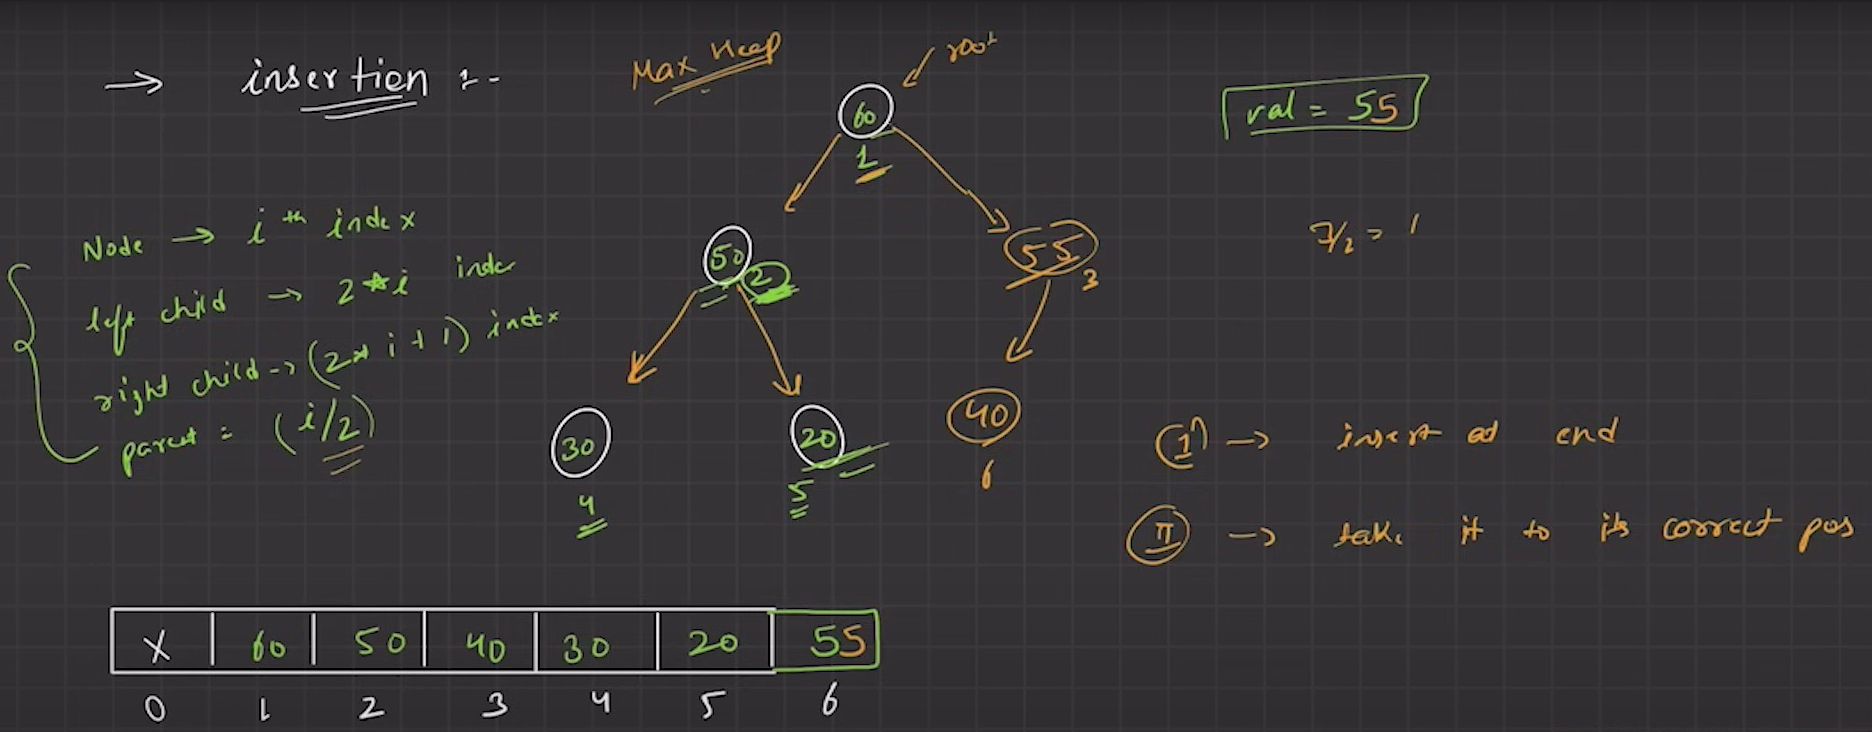
- 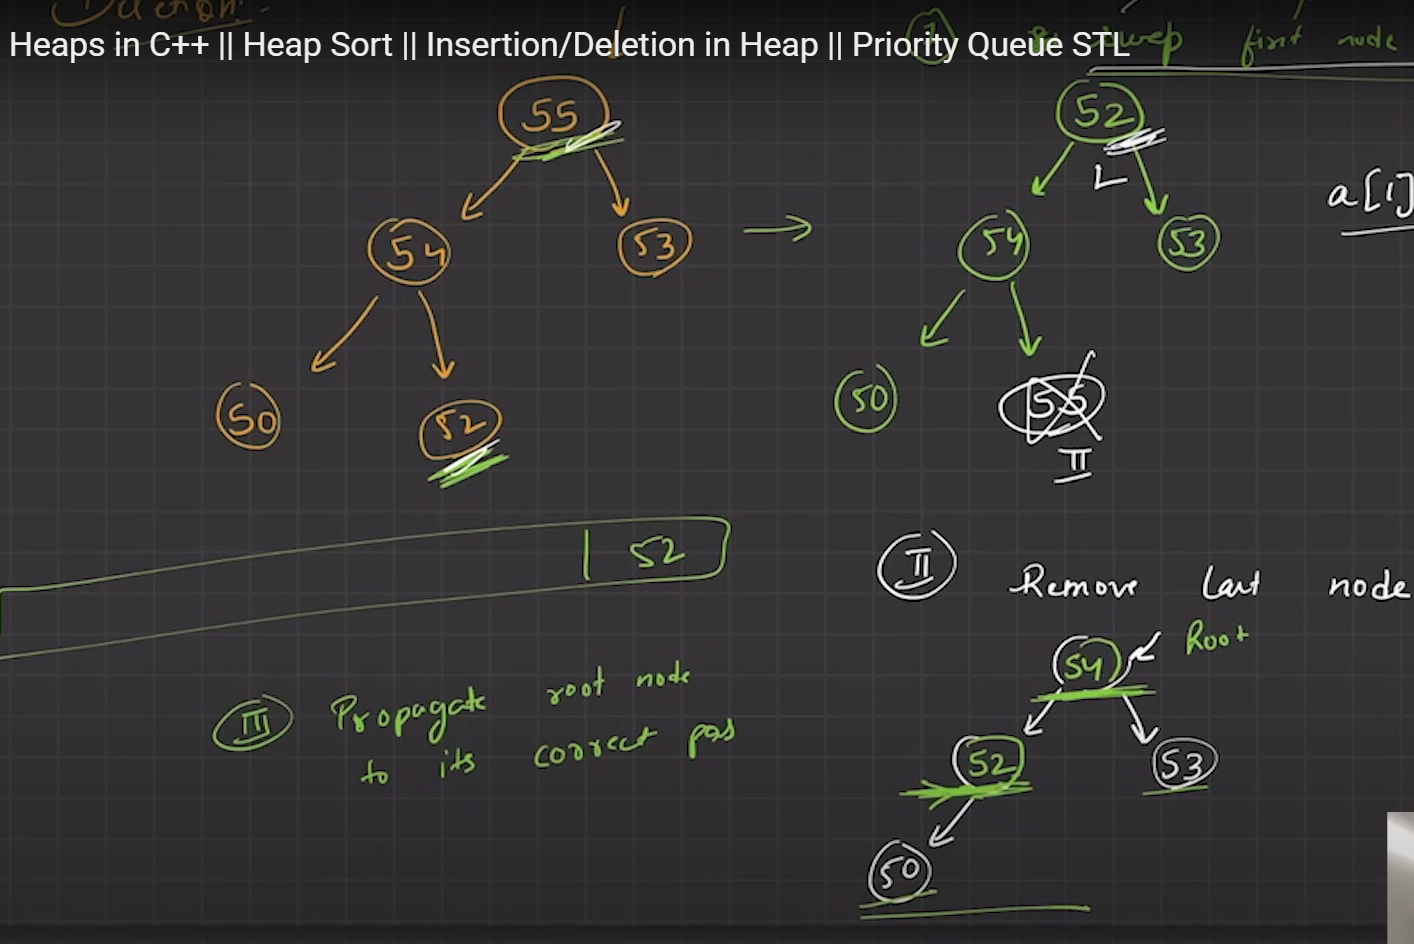

- The last non-leaf node in a heap array is at index (n//2)-1

In [ ]:
# Implementing a Min Heap from scratch

class Heap:
    
    def __init__(self):
        # here self.arr is the min heap 
        self.arr=[]
        self.size=0

    def push(self,val):  # TC: O(log n) SC: O(1)
        self.arr.append(val)
        self.size+=1
        index=self.size-1
        while index>0:
            parent=(index-1)//2
            if self.arr[parent]>self.arr[index]:  # in min heap parent should be smaller than child
                self.arr[parent],self.arr[index]=self.arr[index],self.arr[parent]
                index=parent
            else: # min heap condition satisfied
                return 
            
    def heapify(self,index): # build a heap from an array. TC: O(n) SC: O(1)
        while True:
            smallest=index
            left=2*index+1
            right=2*index+2
            if left<self.size and self.arr[left]<self.arr[smallest]:
                smallest=left
            if right<self.size and self.arr[right]<self.arr[smallest]:
                smallest=right
            if smallest!=index:
                self.arr[index],self.arr[smallest]=self.arr[smallest],self.arr[index]
                index=smallest
            else:
                break
        return
    
    def build_heap(self,arr): # TC: O(n) SC: O(1)
        self.arr=arr
        self.size=len(arr)
        for i in range((self.size-2)//2,-1,-1): # because from n//2 to n-1 are leaf nodes, so they are heaps in themselves
            self.heapify(i) # heapify the non-leaf nodes from bottom to top
        return
    
    def pop(self): # TC: O(log n) SC: O(1)
        if self.size==0:
            return None
        mini=self.arr[0]
        self.arr[0]=self.arr[-1] # replace root with last element
        self.arr.pop() # remove last element
        self.size-=1
        index=0
        self.heapify(index)
        return mini

    def display(self):
        print(self.arr)

In [ ]:
arr=[-4,3,1,0,2,5,10,8,12,9]
h=Heap()
h.build_heap(arr) # build a min heap from the array
h.display() # display the heap
h.push(7) # insert an element into the heap
h.display() # display the heap after insertion
print(h.pop())
h.display()

[-4, 0, 1, 3, 2, 5, 10, 8, 12, 9]
[-4, 0, 1, 3, 2, 5, 10, 8, 12, 9, 7]
-4
[0, 2, 1, 3, 7, 5, 10, 8, 12, 9]


## Problems

In [ ]:
# Convert Min Heap to Max Heap

class Solution:
    def convertMinToMaxHeap(self, N, arr):
        # Code here
        def heapify(arr,index): # for max heap
            n=len(arr)
            while True:
                largest=index
                l=2*index+1
                r=2*index+2
                if l<n and arr[l]>arr[largest]:
                    largest=l
                if r<n and arr[r]>arr[largest]:
                    largest=r
                if largest!=index:
                    arr[largest],arr[index]=arr[index],arr[largest]
                    index=largest
                else:
                    break
            return arr
        # start from last non-leaf node and heapify downwards
        n=len(arr)
        for i in range((n//2)-1,-1,-1):
            arr=heapify(arr,i)
        return arr

In [ ]:
# Maximum Sum Combinations 

import heapq

class Solution:
    def solve(self, A, B, C):
        A.sort(reverse=True)
        B.sort(reverse=True)

        n = len(A)
        max_heap = []
        visited = set()

        # Initial pair (0,0)
        heapq.heappush(max_heap, (-(A[0] + B[0]), 0, 0))
        visited.add((0, 0))

        result = []

        for _ in range(C):
            curr_sum, i, j = heapq.heappop(max_heap)
            result.append(-curr_sum)

            if i + 1 < n and (i + 1, j) not in visited:
                heapq.heappush(max_heap, (-(A[i + 1] + B[j]), i + 1, j))
                visited.add((i + 1, j))

            if j + 1 < n and (i, j + 1) not in visited:
                heapq.heappush(max_heap, (-(A[i] + B[j + 1]), i, j + 1))
                visited.add((i, j + 1))

        return result


In [ ]:
# Find Median in a Stream of Integers

import heapq
class MedianFinder:

    def __init__(self):
        self.small=[]
        self.large=[]
        

    def addNum(self, num: int) -> None:
        heapq.heappush(self.small,-num)
        if self.small and self.large and -1*self.small[0]>self.large[0]:
            ele=-heapq.heappop(self.small)
            heapq.heappush(self.large,ele)
        if len(self.small)>len(self.large)+1:
            ele=-heapq.heappop(self.small)
            heapq.heappush(self.large,ele)
        if len(self.large)>len(self.small)+1:
            ele=heapq.heappop(self.large)
            heapq.heappush(self.small,-ele)
                

    def findMedian(self) -> float:
        if len(self.small)>len(self.large):
            return -self.small[0]
        elif len(self.large)>len(self.small):
            return self.large[0]
        else:
            return (-(self.small[0])+self.large[0])/2
        

In [ ]:
# Find top k most frequent elements

import heapq
from collections import defaultdict
class Solution:
    def topKFrequent(self, nums: List[int], k: int) -> List[int]:
        mp=defaultdict(int)
        for num in nums:
            mp[num]+=1
        ind=0
        n=len(nums)
        hp=[]
        for key,value in mp.items():
            heapq.heappush(hp,(value,key))
            if len(hp)>k:
                heapq.heappop(hp)
        ans=[]
        while hp:
            freq,ele=heapq.heappop(hp)
            ans.append(ele)
        return ans
        


In [ ]:
# Sort K Sorted Array

class MinHeap:
    
    def __init__(self):
        self.arr=[]
        self.size=0
    
    def push(self,val):
        self.arr.append(val)
        self.size+=1
        ind=self.size-1
        while ind>0:
            par=(ind-1)//2
            if self.arr[ind]<self.arr[par]:
                self.arr[ind],self.arr[par]=self.arr[par],self.arr[ind]
                ind=par
            else:
                break
        return 
    
    def get_min(self):
        mini=self.arr[0]
        self.arr[0]=self.arr[-1]
        self.arr.pop()
        self.size-=1
        self.heapify(0)
        return mini
    
    def heapify(self,index): # build a heap from an array. TC: O(n) SC: O(1)
        while True:
            smallest=index
            left=2*index+1
            right=2*index+2
            if left<self.size and self.arr[left]<self.arr[smallest]:
                smallest=left
            if right<self.size and self.arr[right]<self.arr[smallest]:
                smallest=right
            if smallest!=index:
                self.arr[index],self.arr[smallest]=self.arr[smallest],self.arr[index]
                index=smallest
            else:
                break
        return
    
    def get_size(self):
        return self.size
    

class Solution:
    def nearlySorted(self, arr, k):
        heap=MinHeap()
        i=0
        ind=0
        n=len(arr)
        while ind<n:
            heap.push(arr[ind])
            if heap.get_size()>k:
                mini=heap.get_min()
                arr[i]=mini
                i+=1
            ind+=1
        while heap.get_size()>0:
            mini=heap.get_min()
            arr[i]=mini
            i+=1
        return arr